# Basics - Replacing and Thresholding

Also super common for cleaning datasets.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("AB_NYC_2019.csv")
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


## Dealing with NaNs

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [10]:
df.dropna(subset=["last_review"]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38843 entries, 0 to 48852
Data columns (total 16 columns):
id                                38843 non-null int64
name                              38837 non-null object
host_id                           38843 non-null int64
host_name                         38827 non-null object
neighbourhood_group               38843 non-null object
neighbourhood                     38843 non-null object
latitude                          38843 non-null float64
longitude                         38843 non-null float64
room_type                         38843 non-null object
price                             38843 non-null int64
minimum_nights                    38843 non-null int64
number_of_reviews                 38843 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    38843 non-null int64
availability_365                  38843 non-null int64

In [15]:
df.fillna(0);

## Generic replace

In [16]:
df.replace("John", "Jono").head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Jono,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [17]:
df.host_name.replace("John", "Jono", limit=1)[0]

'Jono'

In [18]:
df.replace({"John": "Jono", "Brooklyn": "Brooky"}).head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Jono,Brooky,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


## Thresholding

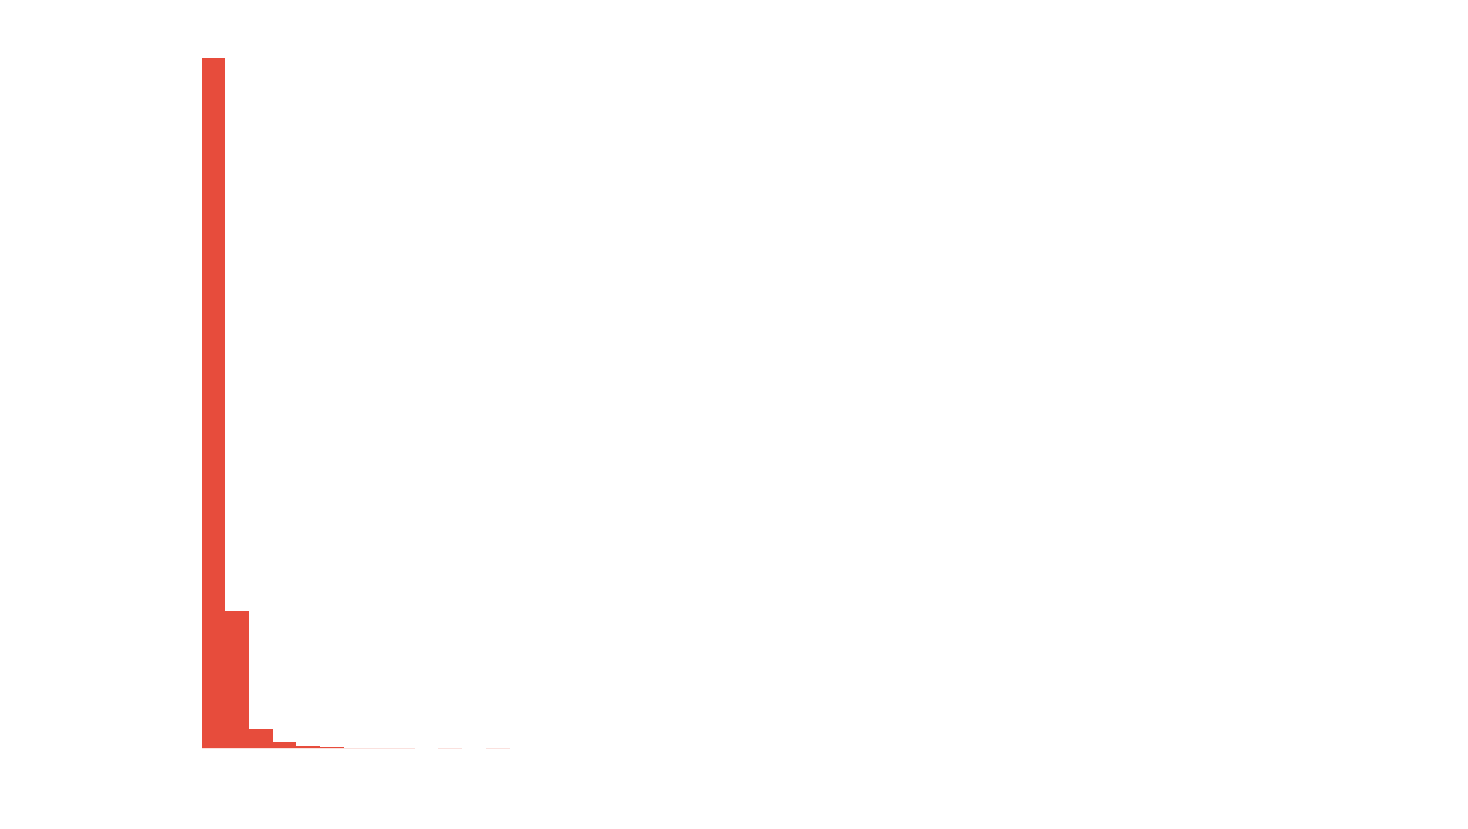

In [22]:
import matplotlib.pyplot as plt
plt.hist(df.price);

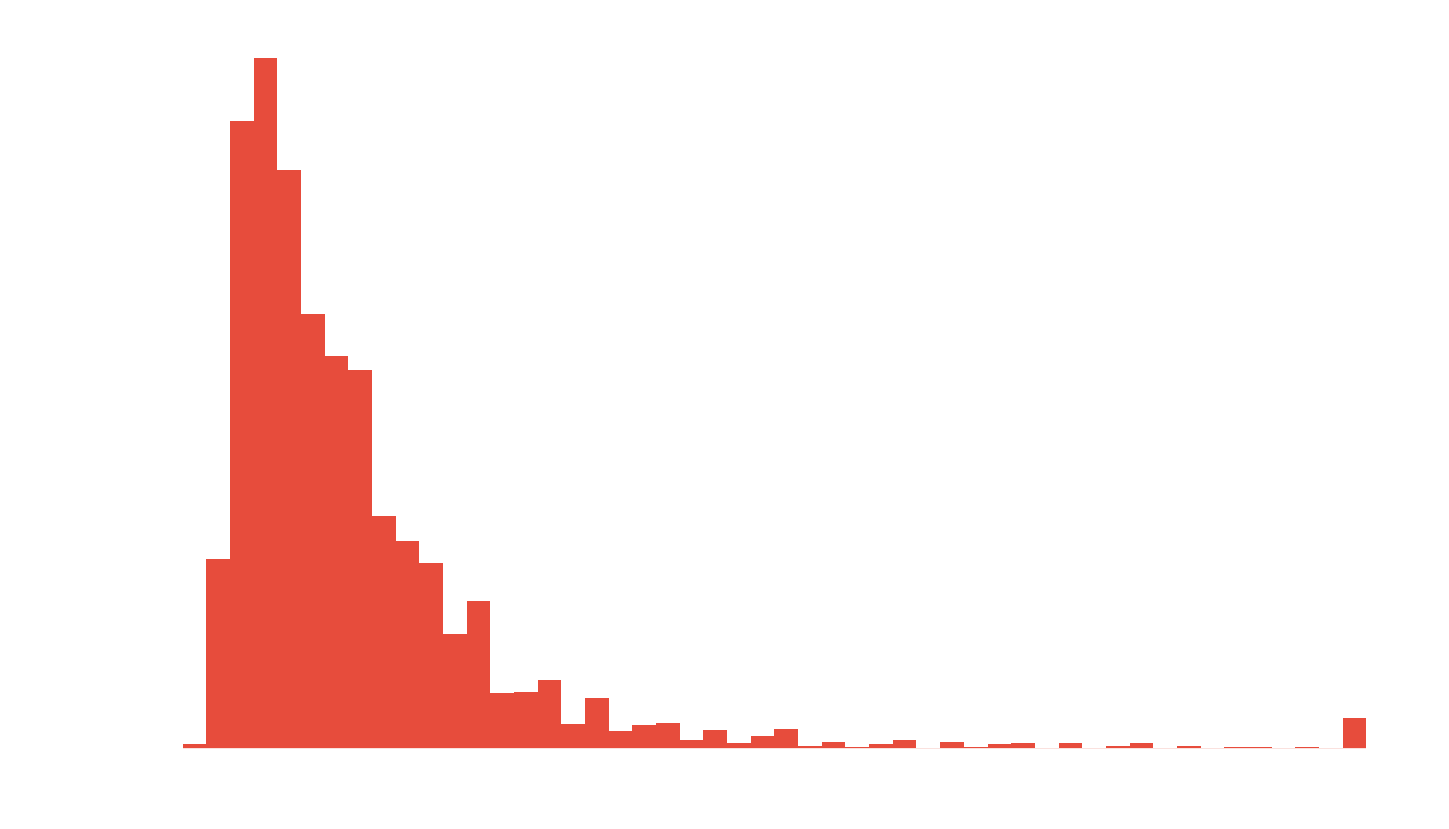

In [23]:
plt.hist(df.price.clip(upper=1000));

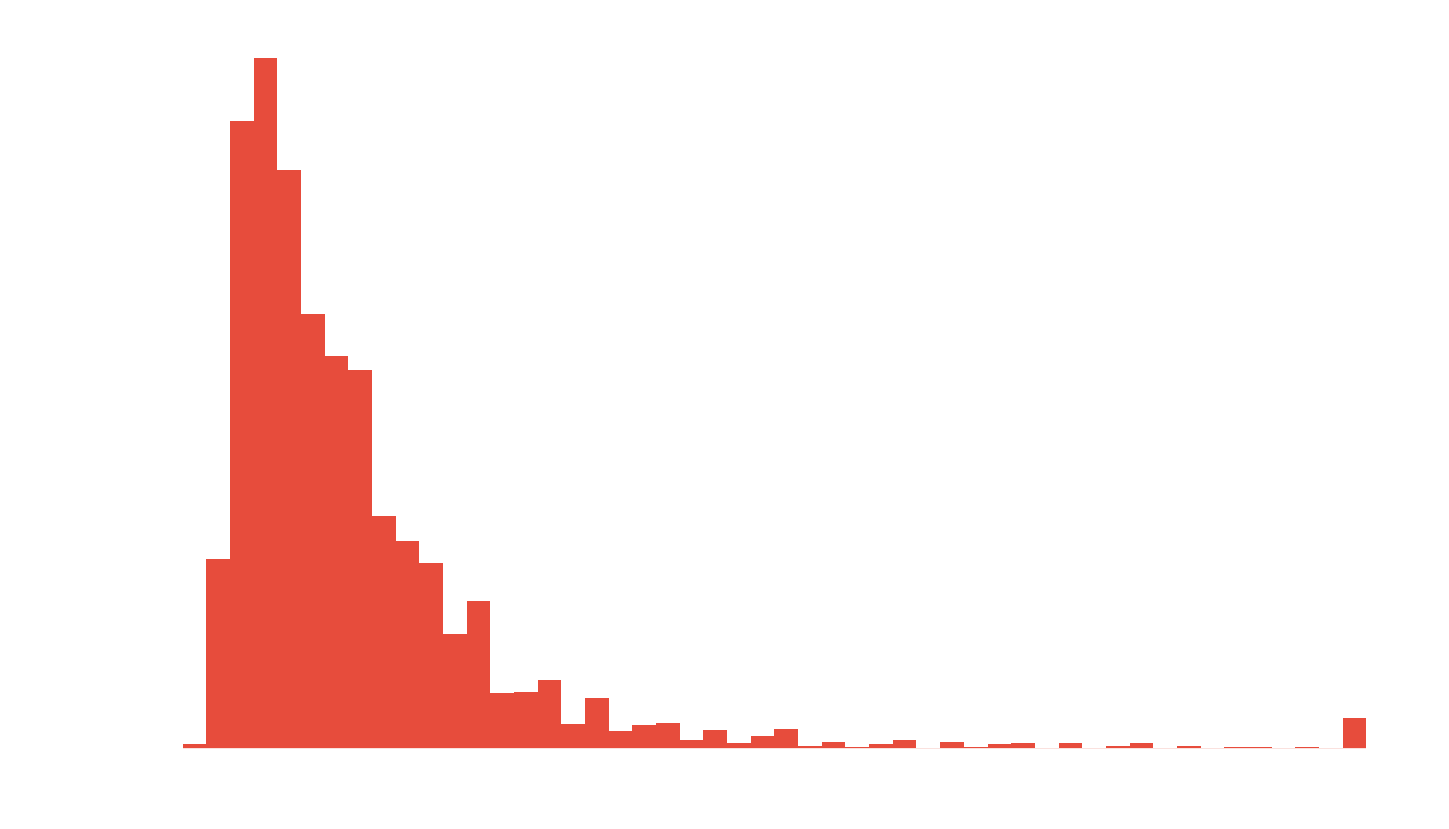

In [24]:
df2 = df.copy()
df2.loc[df2.price > 1000, "price"] = 1000
plt.hist(df2.price);

### Recap

* dropna
* fillna
* replace
* clip
* manual thresholding